### Hosting my notebooks on [Binder](http://docs.mybinder.org/)

# Exploration of a [dataset](https://data.hdx.rwlabs.org/dataset/ebola-outbreaks-before-2014) on Ebola outbreaks before 2014

source: Humanitarian Data Exchange ([HDX](http://data.hdx.rwlabs.org/))

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from bokeh.charts import Histogram, Bar, BoxPlot, Scatter
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file
from bokeh.palettes import Spectral11

### Loading the dataset to a Pandas dataframe

In [2]:
ebola_df = pd.read_csv("data/out/ebola_outbreaks_before_2014-geometry_fixed.csv", encoding="utf-8", index_col=False)

ebola_data = ebola_df.drop(ebola_df.columns[[0, 1, 2, 9]], axis=1)

In [3]:
ebola_data.head(3)

country_code_iso_2_digits country_name  duration_days ebola_subtype  \
0                        RU       Russia            365   Zaire virus   
1                        PH  Philippines            365  Reston virus   
2                        US          USA            364  Reston virus   

               end_date          end_datetime  \
0  2004-12-31T00:00:00Z  2004-12-31T00:00:00Z   
1  1996-12-31T00:00:00Z  1996-12-31T00:00:00Z   
2  1990-12-31T00:00:00Z  1990-12-31T00:00:00Z   

                                            geometry  \
0  (POLYGON ((132.448985 42.845404, 132.44988 42....   
1  (POLYGON ((119.849783 4.796861, 119.833995 4.7...   
2  (POLYGON ((-155.606519 20.137956, -155.586363 ...   

                                    geometry_geojson   latitude   longitude  \
0  {u'type': u'MultiPolygon', u'coordinates': [[[...  64.686314   97.745306   
1  {u'type': u'MultiPolygon', u'coordinates': [[[...  12.750349  122.731210   
2  {u'type': u'MultiPolygon', u'coordinates': [[[...  39.783730 -100.445882   

   reported_number_of_deaths_among_cases  reported_number_of_human_cases  \
0                                      1                               1   
1                                      0                               0   
2                                      0                               4   

   reported_of_deaths_among_cases            start_date        start_datetime  \
0                               1  2004-01-01T00:00:00Z  2004-01-01T00:00:00Z   
1                               0  1996-01-01T00:00:00Z  1996-01-01T00:00:00Z   
2                               0  1990-01-01T00:00:00Z  1990-01-01T00:00:00Z   

  year_s  
0   2004  
1   1996  
2   1990

### Ebola outbreaks per country

In [4]:
# Handle non-ASCII character
ebola_data = ebola_data.replace(u"C\xf4te d'Ivoire (Ivory Coast)", 
                                u"Cote d'Ivoire (Ivory Coast)")

#### General description

In [5]:
outbrks_data = ebola_data.groupby(["country_name"])["country_name"].count().order()

print outbrks_data

outbrks_data.describe()

country_name
Cote d'Ivoire (Ivory Coast)         1
England                             1
Italy                               1
South Africa                        1
Russia                              2
Philippines                         3
Sudan (South Sudan)                 3
USA                                 3
Gabon                               4
Uganda                              5
Democratic Republic of the Congo    9
Name: country_name, dtype: int64


count    11.000000
mean      3.000000
std       2.408319
min       1.000000
25%       1.000000
50%       3.000000
75%       3.500000
max       9.000000
Name: country_name, dtype: float64

* Prior to 2014, there has been Ebola outbreaks in **11** countries.

* Those countries have had between **1** and **9** outbreaks.

#### Distribution of outbreaks per country

In [6]:
total_outbrks = ebola_data.groupby(["country_name"])["country_name"].count().sum()
outbrks_percent = outbrks_data.mul(100).truediv(total_outbrks)

data = outbrks_percent.to_frame(name='proportions of outbreaks (%)')

print data

bar_outbrks = Bar(data, values='proportions of outbreaks (%)', color='navy',
                   title="Proportion of ebola outbreaks per country in %")

output_notebook()
output_file("outbreaks.html", title="Proportion of ebola outbreaks per country in %")

show(bar_outbrks)

                                  proportions of outbreaks (%)
country_name                                                  
Cote d'Ivoire (Ivory Coast)                           3.030303
England                                               3.030303
Italy                                                 3.030303
South Africa                                          3.030303
Russia                                                6.060606
Philippines                                           9.090909
Sudan (South Sudan)                                   9.090909
USA                                                   9.090909
Gabon                                                12.121212
Uganda                                               15.151515
Democratic Republic of the Congo                     27.272727


Loading BokehJS ...

* Almost one third of the outbreaks before 2014 happened in DRC

#### Distribution of ebola victims per country

In [7]:
ebola_data[["country_name", "reported_number_of_human_cases"]].groupby(["country_name"]).sum()

reported_number_of_human_cases
country_name                                                    
Cote d'Ivoire (Ivory Coast)                                    1
Democratic Republic of the Congo                            1201
England                                                        1
Gabon                                                        214
Italy                                                          0
Philippines                                                    9
Russia                                                         2
South Africa                                                   2
Sudan (South Sudan)                                          335
USA                                                            4
Uganda                                                       592

In [9]:
df_ebola_victims = ebola_data[["country_name", "reported_number_of_human_cases", 
                             "reported_number_of_deaths_among_cases"]]

In [10]:
box_ev = BoxPlot(df_ebola_victims, values="reported_number_of_human_cases",
                 label='country_name', title="Number of ebola victims per country",
                 outliers=False, whisker_color='country_name')

output_notebook()
output_file("victims.html", title="Number of ebola victims per country")

show(box_ev)

Loading BokehJS ...

In [11]:
ebola_data[["country_name", "reported_number_of_deaths_among_cases"]].groupby(["country_name"]).sum()

reported_number_of_deaths_among_cases
country_name                                                           
Cote d'Ivoire (Ivory Coast)                                           0
Democratic Republic of the Congo                                    946
England                                                               0
Gabon                                                               150
Italy                                                                 0
Philippines                                                           0
Russia                                                                2
South Africa                                                          1
Sudan (South Sudan)                                                 180
USA                                                                   0
Uganda                                                              269

In [12]:
box_ed = BoxPlot(df_ebola_victims, values="reported_number_of_deaths_among_cases", 
                 label='country_name', title="Number of deaths from ebola per country",
                 outliers=False, whisker_color='country_name')

output_notebook()
output_file("deaths.html", title="Number of deaths from ebola per country")

show(box_ed)

Loading BokehJS ...

* The number of victims (cases and deaths) tends to vary in one country depending on the outbreak
* The number of victims seem to correlate with the number of outbreak except when looking at The USA and South Sudan.

The number of victims could be due to the country's health system or the moment in time when the outbreak occurred.

=> It be interested to plot the number of victims vs the number of outbreaks, a value from WHO representing countries health system score and to look at the number of victims over time

I'd like to look at: 
* number of human cases vs virus subtype
* number of human deaths vs virus subtype
* number of outbreaks vs number of human cases
* number of outbreaks vs average length of outbreaks
* number of human cases vs average length of outbreaks
* look at the timeline of global outbreaks and outbreaks per affected country
* look at the global state of the most frequently affected countries

### Virus subtypes

In [30]:
cases_by_subtype = ebola_data[["ebola_subtype", "reported_number_of_human_cases"]].groupby(["ebola_subtype"]).sum()
cases_by_subtype

reported_number_of_human_cases
ebola_subtype                                   
Bundibugyo virus                             185
Reston virus                                  13
Sudan virus                                  779
Taï Forest virus                               1
Zaire virus                                 1383

In [36]:
total_cases_by_subtype = cases_by_subtype.sum()
cases_subtype_percent = cases_by_subtype.mul(100).truediv(total_cases_by_subtype)

cases_subtype_percent

reported_number_of_human_cases
ebola_subtype                                   
Bundibugyo virus                        7.835663
Reston virus                            0.550614
Sudan virus                            32.994494
Taï Forest virus                        0.042355
Zaire virus                            58.576874

In [37]:
deaths_by_subtype = ebola_data[["ebola_subtype", "reported_number_of_deaths_among_cases"]].groupby(["ebola_subtype"]).sum()
deaths_by_subtype

reported_number_of_deaths_among_cases
ebola_subtype                                          
Bundibugyo virus                                     50
Reston virus                                          0
Sudan virus                                         412
Taï Forest virus                                      0
Zaire virus                                        1086

In [39]:
total_deaths_by_subtype = deaths_by_subtype.sum()
deaths_subtype_percent = deaths_by_subtype.mul(100).truediv(total_deaths_by_subtype)

deaths_subtype_percent

reported_number_of_deaths_among_cases
ebola_subtype                                          
Bundibugyo virus                               3.229974
Reston virus                                   0.000000
Sudan virus                                   26.614987
Taï Forest virus                               0.000000
Zaire virus                                   70.155039

In [38]:
outbrks_by_subtype = ebola_data.groupby(["ebola_subtype"])["ebola_subtype"].count()
total_outbrks_by_subtype = outbrks_by_subtype.sum()
outbrks_subtype_percent = outbrks_by_subtype.mul(100).truediv(total_outbrks_by_subtype)

data_percent = outbrks_subtype_percent.to_frame(name='Outbreaks by virus subtype (%)')
data_percent

Outbreaks by virus subtype (%)
ebola_subtype                                   
Bundibugyo virus                        6.060606
Reston virus                           21.212121
Sudan virus                            24.242424
Taï Forest virus                        3.030303
Zaire virus                            45.454545

In [40]:
all_subtypes_proportions = {"Ebola subtypes" : ["Bundibugyo virus", "Reston virus", "Sudan virus", "Taï Forest virus", "Zaire virus"],
                            "Outbreaks by virus subtype (%)" : [6.060606, 21.212121, 24.242424, 3.030303, 45.454545],
                            "Reported human cases by virus subtype (%)" : [7.835663, 0.550614, 32.994494, 0.042355, 58.576874],
                            "Reported deaths among cases by virus subtype (%)" : [3.229974, 0.0, 26.614987, 0.0, 70.155039]}

In [41]:
data_subtypes_proportions = pd.DataFrame(all_subtypes_proportions)

In [50]:
data_subtypes_proportions

Ebola subtypes  Outbreaks by virus subtype (%)  \
0  Bundibugyo virus                        6.060606   
1      Reston virus                       21.212121   
2       Sudan virus                       24.242424   
3  Taï Forest virus                        3.030303   
4       Zaire virus                       45.454545   

   Reported deaths among cases by virus subtype (%)  \
0                                          3.229974   
1                                          0.000000   
2                                         26.614987   
3                                          0.000000   
4                                         70.155039   

   Reported human cases by virus subtype (%)  
0                                   7.835663  
1                                   0.550614  
2                                  32.994494  
3                                   0.042355  
4                                  58.576874

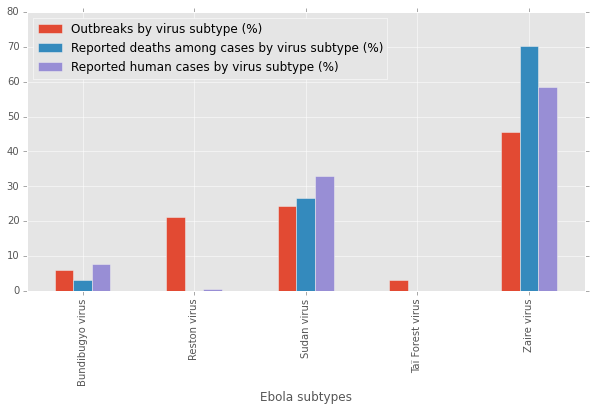

In [87]:
data_subtypes_proportions.plot(kind="bar", x="Ebola subtypes", figsize=(10,5))

#### Out of the 5 virus subtypes: 
* 2 are responsible for low proportions of outbreaks, human cases and deaths (Taï Forest virus and Bundibugyo virus)
* 2 are responsible for high proportions of outbreaks, human cases and deaths (Zaïre virus and Sudan virus)
* 1 is responsible for a high proportion of outbreaks, but low proportion of human cases or deaths (Reston virus)

#### The Zaïre virus accounts for 70% of reported death cases

### Time series

In [90]:
outbreaks_dates_by_country = ebola_data[['country_name', 'start_date', 'start_date', ]]